# Merging tables

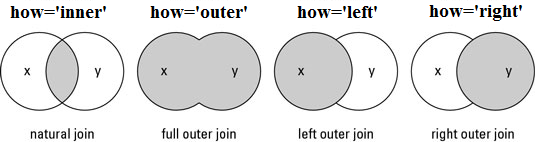

## Inner join

Returns only values that are present in both tables (that can match)

function .merge()
arguments 1) what we want to merge 2) on which parameters (that are same in both tables)

### Example 1

TASK: find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7)

We have 3 tables of petrol station data (ridership, cal, stations) 

In [ ]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == 'Weekday') 
                   & (ridership_cal_stations['station_name'] == 'Wilson'))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

Wilson station had 140,005 riders during weekdays in July.

### Example 2

In [ ]:
# Merge licenses and zip_demo, on zip; and merge the wards on ward
licenses_zip_ward = licenses.merge(zip_demo, on="zip") \
            			.merge(wards, on="ward")

# Print the results by alderman and show median income
print(licenses_zip_ward.groupby("alderman").agg({'income':'median'}))

                             income
    alderman                           
    Ameya Pawar                 66246.0
    Anthony A. Beale            38206.0
    Anthony V. Napolitano       82226.0
    Ariel E. Reyboras           41307.0
    Brendan Reilly             110215.0
    Brian Hopkins               87143.0
    Carlos Ramirez-Rosa         66246.0
    Carrie M. Austin            38206.0
    Chris Taliaferro            55566.0
    Daniel "Danny" Solis        41226.0
    David H. Moore              33304.0
    Deborah Mell                66246.0
    Debra L. Silverstein        50554.0
    Derrick G. Curtis           65770.0
    Edward M. Burke             42335.0
    Emma M. Mitts               36283.0
    George Cardenas             33959.0
    Gilbert Villegas            41307.0
    Gregory I. Mitchell         24941.0
    Harry Osterman              45442.0
    Howard B. Brookins, Jr.     33304.0
    James Cappleman             79565.0
    Jason C. Ervin              41226.0
    Joe Moore                   39163.0
    John S. Arena               70122.0
    Leslie A. Hairston          28024.0
    Margaret Laurino            70122.0
    Marty Quinn                 67045.0
    Matthew J. O'Shea           59488.0
    Michael R. Zalewski         42335.0
    Michael Scott, Jr.          31445.0
    Michelle A. Harris          32558.0
    Michelle Smith             100116.0
    Milagros "Milly" Santiago   41307.0
    Nicholas Sposato            62223.0
    Pat Dowell                  46340.0
    Patrick Daley Thompson      41226.0
    Patrick J. O'Connor         50554.0
    Proco "Joe" Moreno          87143.0
    Raymond A. Lopez            33959.0
    Ricardo Munoz               31445.0
    Roberto Maldonado           68223.0
    Roderick T. Sawyer          32558.0
    Scott Waguespack            68223.0
    Susan Sadlowski Garza       38417.0
    Tom Tunney                  88708.0
    Toni L. Foulkes             27573.0
    Walter Burnett, Jr.         87143.0
    William D. Burns           107811.0
    Willie B. Cochran           28024.0

### Example 3

In [ ]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(["vacant", "account", "pop_2010"], 
                                             ascending=[False, True, True])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())

     ward  pop_2010  vacant  account
    47    7     51581      19       80
    12   20     52372      15      123
    1    10     51535      14      130
    16   24     54909      13       98
    7    16     51954      13      156

## Left join

Returns all rows of the left table and only the rows that match from right table. 

The result will always have the same amount of rows as left table.

function .merge() + argument on="" & how="left"  the default value for how="inner"

In [ ]:
# Merge the movies table with the financials table with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

# 1574

If your goal is to enhance or enrich a dataset, then you do not want to lose any of your original data. A left join will do that by returning all of the rows of your left table, while using an inner join may result in lost data if it does not exist in both tables.

## Right join

Only rows from left table that match with right table are returned.

### Different column names in tables

function .merge(), table_name, how="right", left_on="id", right_on="movie_id"

In [ ]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isnull()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on="id", right_on="movie_id")

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

        id                         title  popularity release_date  movie_id genre_act        genre_sci
    0  18841  The Lost Skeleton of Cadavra       1.681   2001-09-12     18841       NaN  Science Fiction
    1  26672     The Thief and the Cobbler       2.439   1993-09-23     26672       NaN  Science Fiction
    2  15301      Twilight Zone: The Movie      12.903   1983-06-24     15301       NaN  Science Fiction
    3   8452                   The 6th Day      18.447   2000-11-17      8452       NaN  Science Fiction
    4   1649    Bill & Ted's Bogus Journey      11.350   1991-07-19      1649       NaN  Science Fiction
    (258, 7)

## Outer join

Returns all results whether there is a match or not

function .merge(), table_name, on="id", how="outer"

### Example 1

In [ ]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on="movie_id", 
                                      right_on="id")

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

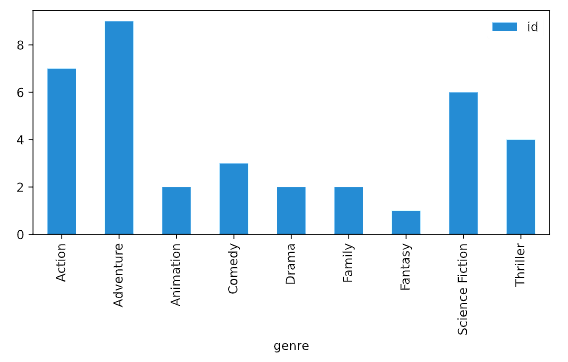

### Example 2

In [ ]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on="id",
                                     how="outer",
                                     suffixes=["_1", "_2"])

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                   character_1      id           name_1 character_2 name_2
0                       Yinsen   17857       Shaun Toub         NaN    NaN
2  Obadiah Stane / Iron Monger    1229     Jeff Bridges         NaN    NaN
3                  War Machine   18288  Terrence Howard         NaN    NaN
5                         Raza   57452      Faran Tahir         NaN    NaN
8                   Abu Bakaar  173810    Sayed Badreya         NaN    NaN

Using an outer join, we picked only those rows where the actor played in only one of the two movies.

# Self-join

Merging a table to itself. Useful for hierarchical relationships, sequential relationships, graph data.